# Машинное обучение (семинары)
## Урок 5. Оцениваем точность моделей с помощью разнообразных метрик
Используя набор данных load_breast_cancer, примените метрики для оценки качества модели классификации. Затем, используя набор данных об ирисах, примените метрики для оценки качества модели классификации.

Шаги для выполнения задания:

1. Загрузите набор данных о домах и набор данных об ирисах.

2. Разделите данные на обучающую и тестовую выборки.

3. Создайте модель регрессии и обучите ее на обучающей выборке.

4. Примените метрики для оценки качества модели классификации на тестовой выборке.

5. Создайте модель классификации и обучите ее на обучающей выборке.

6. Примените метрики для оценки качества модели классификации на тестовой выборке.

In [85]:
import pandas as pd
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [86]:
# Загрузка данных
data_breast = load_breast_cancer()
data_iris = load_iris()

In [87]:
# Рисуем матрицу 
def matrix (y_test, y_pred, model):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(model)
    plt.show()

In [88]:
# Рисуем ROC
def draw_roc(y_test, y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Строим график
    plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend(loc="lower right")
    plt.show()

In [89]:
# Функция для оценки модели
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print('Model - ',model)
    matrix(y_test, y_pred, model)
    print('Matrix:\n', confusion_matrix(y_test, y_pred))
    print('Accuracy:', accuracy_score(y_test, y_pred))
    if model == model_breast:
    # Бинарная задача (рак)
        print('Precision:', precision_score(y_test, y_pred, average='binary'))
        print('F1-score:', f1_score(y_test, y_pred, average='binary'))
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        print('AUC:', roc_auc, end='\n\n')
        draw_roc(y_test, y_pred)
    else:
    # Многоклассовая задача (ирисы)
        print('Precision:', precision_score(y_test, y_pred, average='micro'))
        print('Recall:', recall_score(y_test, y_pred, average='micro'))
        print('F1-score:', f1_score(y_test, y_pred, average='micro')) 
    

Model -  LogisticRegression(max_iter=10000)


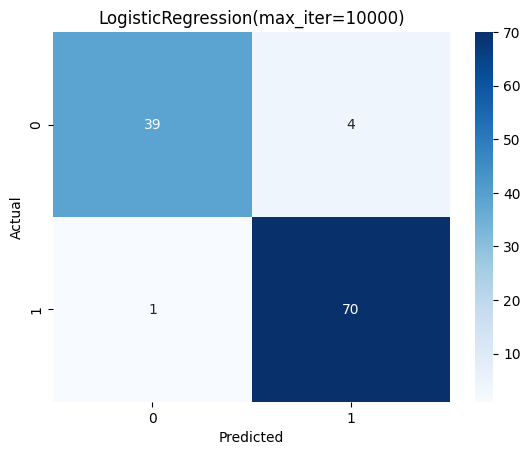

Matrix:
 [[39  4]
 [ 1 70]]
Accuracy: 0.956140350877193
Precision: 0.9459459459459459
F1-score: 0.9655172413793104
AUC: 0.9977071732721913



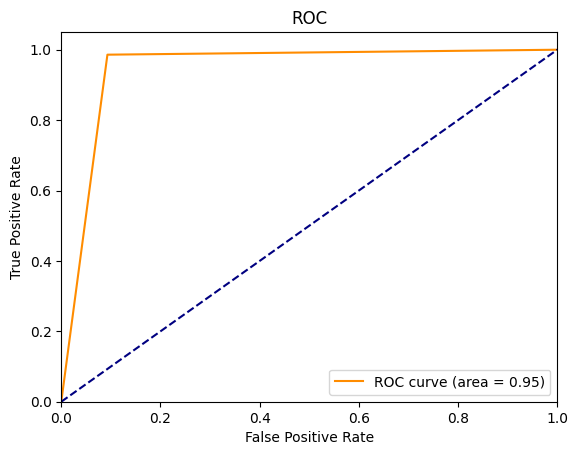

Model -  OneVsRestClassifier(estimator=LogisticRegression())


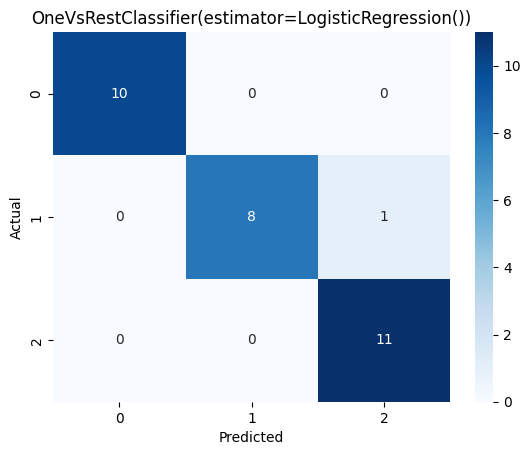

Matrix:
 [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
Accuracy: 0.9666666666666667
Precision: 0.9666666666666667
Recall: 0.9666666666666667
F1-score: 0.9666666666666667


In [90]:
# Разделение данных на обучающую и тестовую выборки
X_train_breast, X_test_breast, y_train_breast, y_test_breast = train_test_split(
    data_breast.data, data_breast.target, test_size=0.2, random_state=42)

X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    data_iris.data, data_iris.target, test_size=0.2, random_state=42)

# Создание и обучение моделей
model_breast = LogisticRegression(max_iter=10000)
model_breast.fit(X_train_breast, y_train_breast)

model_iris = OneVsRestClassifier(LogisticRegression())
model_iris.fit(X_train_iris, y_train_iris)

# Оценка моделей
evaluate_model(model_breast, X_test_breast, y_test_breast)
evaluate_model(model_iris, X_test_iris, y_test_iris)